In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import util_michael as util_m
from util import *

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

### Combine train and test data for cleaning

In [3]:
comb = pd.concat([train, test], ignore_index=True, sort=False)
comb = util_m.convert_objects_to_categories(comb)
combcopy = comb.copy()
comb.shape

(2919, 81)

In [5]:
comb.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Check missing values by feature

In [6]:
nas = summary_missing_data(comb)
nas

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


# Fill missing values with "NA" or use ML when NA is not possible
## Start from bottom up

### Exterior1st and Exterior2nd

- See all features that involve **Exterior**

In [7]:
target = 'Exterior1st'
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']
comb[ comb[target].isna() ][cols]

,Neighborhood,Exterior1st,Exterior2nd,ExterQual,ExterCond
2151,Edwards,NaN,NaN,TA,TA


- It's only 1 house that doesn't have the **Exterior1st** and **Exterior2nd** data 
- One option could be to input an **NA**, but that option doesn't exist for that feature
- So let's input it using ML
    - See below for prediction accuracy for each feature

In [8]:
util_m.replace_missing_with_ml(comb, target)

Successfully trained model to predict: Exterior1st
------Evaluation-------
ACC         :  0.5699


In [9]:
util_m.replace_missing_with_ml(comb, 'Exterior2nd')

Successfully trained model to predict: Exterior2nd
------Evaluation-------
ACC         :  0.9205


In [10]:
nas_up = summary_missing_data(comb)
print('Exterior1st' in list(nas_up.index), 'Exterior2nd' in list(nas_up.index))

False False


### SaleType

In [11]:
target = 'SaleType'
cols = [target, 'SaleCondition', 'SalePrice']
comb[ comb[target].isna() ][cols]

,SaleType,SaleCondition,SalePrice
2489,NaN,Normal,NaN


- It's only 1 house to be filled with **SaleType**
- Has no **NA** option
- Use ML
    - See accuracy below

In [12]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: SaleType
------Evaluation-------
ACC         :  0.9438
False


### Kitchen

In [13]:
target = 'KitchenQual'
cols = ['Neighborhood', 'KitchenQual', 'KitchenAbvGr', 'Functional', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,KitchenQual,KitchenAbvGr,Functional,SalePrice
1555,ClearCr,NaN,1,Mod,NaN


- Only 1 house to be filled with **KitchenQual**
- Has no **NA** option
- Use ML
    - See accuracy

In [14]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: KitchenQual
------Evaluation-------
ACC         :  0.7849
False


### Electrical

In [15]:
target = 'Electrical'
cols = ['Neighborhood', 'Electrical', 'Functional', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Electrical,Functional,SalePrice
1379,Timber,NaN,Typ,167500.0


- Only 1 house to be filled with **Electrical**
- Has no **NA** option
- Use ML
    - See accuracy

In [16]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Electrical
------Evaluation-------
ACC         :  0.889
False


### Functional ~ Home functionality (Assume typical unless deductions are warranted)

In [17]:
target = 'Functional'
cols = ['Neighborhood', target, 'Electrical', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Functional,Electrical,OverallCond,OverallQual,YearBuilt,SalePrice
2216,IDOTRR,NaN,FuseA,5,1,1952,NaN
2473,IDOTRR,NaN,SBrkr,1,4,1910,NaN


- Only 2 house to be filled with **Functional**
- Has no **NA** option
- Use ML
    - See accuracy

In [18]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Functional
------Evaluation-------
ACC         :  0.9329
False


### Utilities ~ Type of utilities available

In [19]:
target = 'Utilities'
cols = ['Neighborhood', target, 'Electrical', 'Functional', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Utilities,Electrical,Functional,OverallCond,OverallQual,YearBuilt,SalePrice
1915,IDOTRR,NaN,FuseA,Min1,4,2,1910,NaN
1945,Gilbert,NaN,FuseA,Min2,2,6,1952,NaN


- Only 2 house to be filled with **Utilities**
- Has no **NA** option
- Use ML
    - See accuracy

In [20]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Utilities
------Evaluation-------
ACC         :  1.0
False


### MSZoning ~ Identifies the general zoning classification of the sale.

In [21]:
target = 'MSZoning'
cols = ['Neighborhood', target, 'MSSubClass', 'Electrical', 'Functional', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,MSZoning,MSSubClass,Electrical,Functional,OverallCond,OverallQual,YearBuilt,SalePrice
1915,IDOTRR,NaN,30,FuseA,Min1,4,2,1910,NaN
2216,IDOTRR,NaN,20,FuseA,Typ,5,1,1952,NaN
2250,IDOTRR,NaN,70,SBrkr,Maj1,1,5,1900,NaN
2904,Mitchel,NaN,20,FuseA,Mod,3,1,1951,NaN


- Only 4 house to be filled with **MSZoning**
- Has no **NA** option
- Use ML
    - See accuracy

In [22]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: MSZoning
------Evaluation-------
ACC         :  0.963
False


## What's left to clean?

In [23]:
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


### Go thru

- Garage
- Basement
- Masonry

### then
- LotFrontage
- FirePlace
- Fence
- Alley
- MiscFeature
- PoolQC

### GarageArea & GarageCars
(missing value comes from the same instance)

In [24]:
target = 'GarageArea'
cols = ['Neighborhood', target, 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2576,IDOTRR,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,0,NaN


- **Instance 2576** seems to have a **GarageType** input error
- All other instances with **GarageType == Detchd** do have meaningful information about the garage (see table below), except instance **2576**

- Fill all Garage information on instance 2576 with **NA** (No Garage)

In [25]:
comb[ comb['GarageType'] == 'Detchd' ][cols].sample(10)

,Neighborhood,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2462,BrkSide,379.0,Detchd,1926.0,Unf,2.0,379.0,TA,TA,Y,NaN,0,NaN
2475,SWISU,240.0,Detchd,1942.0,Unf,1.0,240.0,TA,TA,Y,NaN,0,NaN
1416,OldTown,560.0,Detchd,1971.0,Unf,2.0,560.0,TA,TA,N,NaN,0,122500.0
1788,OldTown,576.0,Detchd,1980.0,Fin,2.0,576.0,TA,TA,N,NaN,0,NaN
2483,Sawyer,528.0,Detchd,1972.0,Unf,2.0,528.0,TA,TA,Y,NaN,0,NaN
1897,SWISU,180.0,Detchd,1926.0,Unf,1.0,180.0,Fa,TA,Y,NaN,0,NaN
1100,SWISU,246.0,Detchd,1930.0,Unf,1.0,246.0,TA,TA,N,NaN,0,60000.0
837,BrDale,264.0,Detchd,1973.0,Unf,1.0,264.0,TA,TA,Y,NaN,0,100000.0
93,OldTown,506.0,Detchd,1900.0,Unf,2.0,506.0,TA,TA,Y,NaN,0,133900.0
61,IDOTRR,288.0,Detchd,1935.0,Unf,1.0,288.0,TA,TA,N,NaN,0,101000.0


In [59]:
ix = 2576
comb['GarageType'] = comb['GarageType'].cat.add_categories(['NA'])
comb.at[ix, 'GarageType'] = 'NA'
comb['GarageFinish'] = comb['GarageFinish'].cat.add_categories(['NA'])
comb.at[ix, 'GarageFinish'] = 'NA'
comb.at[ix, 'GarageCars'] = 0
comb.at[ix, 'GarageArea'] = 0
comb['GarageQual'] = comb['GarageQual'].cat.add_categories(['NA'])
comb.at[ix, 'GarageQual'] = 'NA'
comb['GarageCond'] = comb['GarageCond'].cat.add_categories(['NA'])
comb.at[ix, 'GarageCond'] = 'NA'

### GarageType

In [84]:
target = 'GarageType'
cols = ['Neighborhood', target, 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp.sample(15)

,Neighborhood,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
39,Edwards,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,82000.0
48,OldTown,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,113000.0
78,Sawyer,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,136500.0
88,IDOTRR,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,85000.0
89,CollgCr,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,123600.0
99,NAmes,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,Shed,400,128950.0
108,IDOTRR,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,115000.0
125,IDOTRR,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,84500.0
127,OldTown,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,87000.0
140,NAmes,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,115000.0


In [79]:
temp[ temp['GarageArea'] > 0]

,Neighborhood,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice


- These are 157 instances that **DO NOT HAVE A GARAGE**
- Input all of them with **NA**

In [85]:
for ix in list(temp.index):
    comb.at[ix, 'GarageType'] = 'NA'
    comb.at[ix, 'GarageFinish'] = 'NA'
    comb.at[ix, 'GarageCars'] = 0
    comb.at[ix, 'GarageArea'] = 0
    comb.at[ix, 'GarageQual'] = 'NA'
    comb.at[ix, 'GarageCond'] = 'NA'

### GarageQual, GarageFinish and GarageCond	

In [90]:
target = 'GarageQual'
cols = ['Neighborhood', target, 'GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,GarageQual,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2126,OldTown,NaN,Detchd,360.0,NaN,NaN,1.0,NaN,Y,Shed,1000,NaN


- This one instance **HAVE** a garage but doesn't have the information
- Use ML to input the values

In [91]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageQual
------Evaluation-------
ACC         :  0.9356
False


In [92]:
util_m.replace_missing_with_ml(comb, 'GarageFinish')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageFinish
------Evaluation-------
ACC         :  0.7151
False


In [93]:
util_m.replace_missing_with_ml(comb, 'GarageCond')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageCond
------Evaluation-------
ACC         :  0.9575
False


In [94]:
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
BsmtExposure,82,0.028092
BsmtCond,82,0.028092


### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF

In [103]:
target = 'BsmtFinSF1'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,BsmtFinSF1,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinType1,BsmtFinType2,BsmtFinSF2,MiscFeature,MiscVal,SalePrice
2120,BrkSide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


- Instance **2120** has **NO BASEMENT**
- Input **NA**

In [111]:
ix = 2120
comb['BsmtFinType1'] = comb['BsmtFinType1'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtFinType1'] = 'NA'
comb.at[ix, 'BsmtFinSF1'] = 0
comb['BsmtFinType2'] = comb['BsmtFinType2'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtFinType2'] = 'NA'
comb.at[ix, 'BsmtFinSF2'] = 0
comb.at[ix, 'BsmtUnfSF'] = 0
comb.at[ix, 'TotalBsmtSF'] = 0
comb['BsmtQual'] = comb['BsmtQual'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtQual'] = 'NA'
comb['BsmtCond'] = comb['BsmtCond'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtCond'] = 'NA'
comb['BsmtExposure'] = comb['BsmtExposure'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtExposure'] = 'NA'
comb.at[ix, 'BsmtFullBath'] = 0
comb.at[ix, 'BsmtHalfBath'] = 0

In [112]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
BsmtExposure,81,0.027749
BsmtCond,81,0.027749


### BsmtHalfBath and BsmtFullBath

In [113]:
target = 'BsmtHalfBath'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,BsmtHalfBath,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2188,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN


- Instance **2188** has **NO BASEMENT**
- Input **NA**

In [115]:
ix = 2188
comb.at[ix, 'BsmtFinType1'] = 'NA'
comb.at[ix, 'BsmtFinSF1'] = 0
comb.at[ix, 'BsmtFinType2'] = 'NA'
comb.at[ix, 'BsmtFinSF2'] = 0
comb.at[ix, 'BsmtUnfSF'] = 0
comb.at[ix, 'TotalBsmtSF'] = 0
comb.at[ix, 'BsmtQual'] = 'NA'
comb.at[ix, 'BsmtCond'] = 'NA'
comb.at[ix, 'BsmtExposure'] = 'NA'
comb.at[ix, 'BsmtFullBath'] = 0
comb.at[ix, 'BsmtHalfBath'] = 0

In [116]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
BsmtExposure,80,0.027407
BsmtCond,80,0.027407


### BsmtFinType1

In [120]:
target = 'BsmtFinType1'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtFinType1,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
17,Sawyer,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,Shed,500,90000.0
39,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,82000.0
90,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,109900.0
102,SawyerW,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,118964.0
156,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,109500.0
182,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,120000.0
259,OldTown,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,97000.0
342,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,87500.0
362,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,198500.0
371,ClearCr,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,134432.0


- These are 77 instances that **DO NOT HAVE A BASEMENT**
- Input all of them with **NA**

In [121]:
for ix in list(temp.index):
    comb.at[ix, 'BsmtFinType1'] = 'NA'
    comb.at[ix, 'BsmtFinSF1'] = 0
    comb.at[ix, 'BsmtFinType2'] = 'NA'
    comb.at[ix, 'BsmtFinSF2'] = 0
    comb.at[ix, 'BsmtUnfSF'] = 0
    comb.at[ix, 'TotalBsmtSF'] = 0
    comb.at[ix, 'BsmtQual'] = 'NA'
    comb.at[ix, 'BsmtCond'] = 'NA'
    comb.at[ix, 'BsmtExposure'] = 'NA'
    comb.at[ix, 'BsmtFullBath'] = 0
    comb.at[ix, 'BsmtHalfBath'] = 0

In [122]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrType,24,0.008222
MasVnrArea,23,0.007879


### BsmtFinType2

In [123]:
target = 'BsmtFinType2'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtFinType2,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
332,NridgHt,NaN,3206.0,1603.0,Gd,TA,No,1.0,0.0,1124.0,GLQ,479.0,NaN,NaN,0,284000.0


- This instance **BsmtFinType2** value is probably a data entry error since there is a **BsmtFinSF2**
- Let's use ML to input

In [124]:
util_m.replace_missing_with_ml(comb, 'BsmtFinType2')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtFinType2
------Evaluation-------
ACC         :  0.9082
False


### BsmtQual

In [125]:
target = 'BsmtQual'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtQual,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2217,IDOTRR,NaN,173.0,173.0,NaN,Fa,No,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN
2218,IDOTRR,NaN,356.0,356.0,NaN,TA,No,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN


- These two instances **DO HAVE** an **Unfinished** basement
- The quality **BsmtQual** has not been inputted, probably another data entry error
- Do ML to input

In [126]:
util_m.replace_missing_with_ml(comb, 'BsmtQual')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtQual
------Evaluation-------
ACC         :  0.8411
False


### BsmtCond

In [127]:
target = 'BsmtCond'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtCond,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2040,Veenker,NaN,1426.0,0.0,Gd,NaN,Mn,1.0,0.0,1044.0,GLQ,382.0,Rec,NaN,0,NaN
2185,Edwards,NaN,1127.0,94.0,TA,NaN,No,0.0,1.0,1033.0,BLQ,0.0,Unf,NaN,0,NaN
2524,CollgCr,NaN,995.0,240.0,TA,NaN,Av,0.0,0.0,755.0,ALQ,0.0,Unf,NaN,0,NaN


**Same as the last one**
- These three instances **DO HAVE** a basement
- The conditions of the basement **BsmtCond** has not been inputted, probably another data entry error
- Do ML to input

In [128]:
util_m.replace_missing_with_ml(comb, 'BsmtCond')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtCond
------Evaluation-------
ACC         :  0.9053
False


### BsmtExposure

In [129]:
target = 'BsmtExposure'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtExposure,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
948,CollgCr,NaN,936.0,936.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,192500.0
1487,Somerst,NaN,1595.0,1595.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN
2348,Somerst,NaN,725.0,725.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN


**Same as the last one**
- These three instances **DO HAVE** a basement
- The exposure of the basement **BsmtExposure** has not been inputted, probably another data entry error
- Do ML to input

In [130]:
util_m.replace_missing_with_ml(comb, 'BsmtExposure')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtExposure
------Evaluation-------
ACC         :  0.7641
False


In [131]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrType,24,0.008222
MasVnrArea,23,0.007879


### MasVnrArea

In [133]:
target = 'MasVnrArea'
cols = ['Neighborhood', target, 'MasVnrType', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,MasVnrArea,MasVnrType,MiscFeature,MiscVal,SalePrice
234,Gilbert,NaN,NaN,NaN,0,216500.0
529,Crawfor,NaN,NaN,NaN,0,200624.0
650,Somerst,NaN,NaN,NaN,0,205950.0
936,SawyerW,NaN,NaN,NaN,0,184900.0
973,Somerst,NaN,NaN,NaN,0,182000.0
977,Somerst,NaN,NaN,NaN,0,199900.0
1243,NridgHt,NaN,NaN,NaN,0,465000.0
1278,CollgCr,NaN,NaN,NaN,0,237000.0
1691,Gilbert,NaN,NaN,NaN,0,NaN
1706,Somerst,NaN,NaN,NaN,0,NaN


- We will treat this instances as having **NO MASONRY**
- Input **None** for type and **0** for area

In [138]:
# comb['MasVnrType'] = comb['MasVnrType'].cat.add_categories(['None'])
for ix in list(temp.index):
    comb.at[ix, 'MasVnrType'] = 'None'
    comb.at[ix, 'MasVnrArea'] = 0

In [139]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrType,1,0.000343


### MasVnrType

In [140]:
target = 'MasVnrType'
cols = ['Neighborhood', target, 'MasVnrArea', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,MasVnrType,MasVnrArea,MiscFeature,MiscVal,SalePrice
2610,Mitchel,NaN,198.0,NaN,0,NaN


- This instance **DO HAVE** a masonry with 198 square feets
- Use ML to input the type

In [141]:
util_m.replace_missing_with_ml(comb, 'MasVnrType')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: MasVnrType
------Evaluation-------
ACC         :  0.9411
False


In [142]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471


### LotFrontage ~ Linear feet of street connected to property

In [145]:
target = 'LotFrontage'
cols = ['Neighborhood', target, 'Street', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp.sample(10)

,Neighborhood,LotFrontage,Street,SalePrice
2254,Gilbert,NaN,Pave,NaN
136,NAmes,NaN,Pave,143000.0
1644,NWAmes,NaN,Pave,NaN
2141,Sawyer,NaN,Pave,NaN
307,IDOTRR,NaN,Pave,89500.0
2514,CollgCr,NaN,Pave,NaN
1733,Sawyer,NaN,Pave,NaN
2140,Sawyer,NaN,Pave,NaN
660,NWAmes,NaN,Pave,197900.0
1732,Sawyer,NaN,Pave,NaN


- We have no clue on how to input the **LotFrontage**
- Let's test a ML to see how good it does

In [146]:
comb2 = comb.copy()
util_m.replace_missing_with_ml(comb2, 'LotFrontage')

Successfully trained model to predict: LotFrontage
------Evaluation-------
R2          :  0.5425
RMSE        :  15.38


In [147]:
comb['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- It's not so good to predict the **LotFrontage**


- See it's correlation with **SalePrice** and distribution

In [152]:
comb.corr().at['LotFrontage', 'SalePrice']

0.35179909657067854

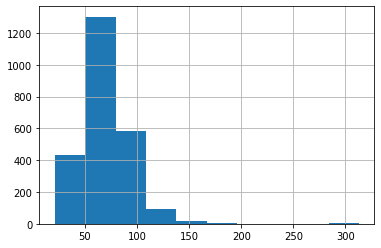

In [150]:
comb['LotFrontage'].hist();

In [27]:
comb[comb['PoolQC'].isna()][['PoolQC', 'PoolArea']].sample(5)

,PoolQC,PoolArea
739,NaN,0
2764,NaN,0
1307,NaN,0
2191,NaN,0
80,NaN,0


In [28]:
comb[ (comb['FireplaceQu'].isna()) & (comb['Fireplaces'] > 0) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


****

## Exploration of missing values

In [29]:
condition = (comb['GarageCond'].isna()) & (comb['GarageType'].notna())
comb[condition][['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageYrBlt', 'MiscFeature', 'MiscVal', 'SalePrice']]

,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,MiscFeature,MiscVal,SalePrice
2126,NaN,NaN,NaN,Detchd,NaN,Shed,1000,NaN
2576,NaN,NaN,NaN,Detchd,NaN,NaN,0,NaN


In [30]:
columns = ['TotalBsmtSF', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'SalePrice']
comb[ (comb['BsmtCond'].isna()) & (comb['BsmtQual'].notna()) ][columns]

,TotalBsmtSF,BsmtExposure,BsmtCond,BsmtQual,SalePrice
2040,1426.0,Mn,NaN,Gd,NaN
2185,1127.0,No,NaN,TA,NaN
2524,995.0,Av,NaN,TA,NaN


In [31]:
columns = ['TotalBsmtSF', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'SalePrice']
comb[ (comb['BsmtExposure'].isna()) & (comb['BsmtQual'].notna()) ][columns]

,TotalBsmtSF,BsmtExposure,BsmtCond,BsmtQual,SalePrice
948,936.0,NaN,TA,Gd,192500.0
1487,1595.0,NaN,TA,Gd,NaN
2348,725.0,NaN,TA,Gd,NaN


In [32]:
columns = ['TotalBsmtSF', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',  'SalePrice']
comb[ (comb['BsmtFinType1'].isna())  ][columns].sample(10)

,TotalBsmtSF,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,SalePrice
2498,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1856,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2803,0.0,NaN,NaN,NaN,NaN,NaN,NaN
156,0.0,NaN,NaN,NaN,NaN,NaN,109500.0
2564,0.0,NaN,NaN,NaN,NaN,NaN,NaN
749,0.0,NaN,NaN,NaN,NaN,NaN,98000.0
1915,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1048,0.0,NaN,NaN,NaN,NaN,NaN,115000.0
371,0.0,NaN,NaN,NaN,NaN,NaN,134432.0
2824,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
columns = ['TotalBsmtSF', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',  'SalePrice']
comb[ (comb['BsmtFinType2'].isna())  ][columns].sample(10)

,TotalBsmtSF,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,SalePrice
1847,0.0,NaN,NaN,NaN,NaN,NaN,NaN
156,0.0,NaN,NaN,NaN,NaN,NaN,109500.0
2435,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1848,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2547,0.0,NaN,NaN,NaN,NaN,NaN,NaN
532,0.0,NaN,NaN,NaN,NaN,NaN,107500.0
371,0.0,NaN,NaN,NaN,NaN,NaN,134432.0
1232,0.0,NaN,NaN,NaN,NaN,NaN,101800.0
868,0.0,NaN,NaN,NaN,NaN,NaN,169000.0
1048,0.0,NaN,NaN,NaN,NaN,NaN,115000.0


In [34]:
columns = ['TotalBsmtSF', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'SalePrice']
comb[ (comb['TotalBsmtSF'] > 0) & 
      (
       comb['BsmtExposure'].isna() | 
       comb['BsmtCond'].isna() | 
       comb['BsmtQual'].isna() | 
       comb['BsmtFinType1'].isna() |
       comb['BsmtFinSF1'].isna() |
       comb['BsmtFinType2'].isna() |
       comb['BsmtFinSF2'].isna() |
       comb['BsmtFullBath'].isna() |
       comb['BsmtHalfBath'].isna() |
       comb['BsmtUnfSF'].isna()
      )
    ][columns]

,TotalBsmtSF,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,SalePrice
332,3206.0,No,TA,Gd,GLQ,1124.0,NaN,479.0,1.0,0.0,1603.0,284000.0
948,936.0,NaN,TA,Gd,Unf,0.0,Unf,0.0,0.0,0.0,936.0,192500.0
1487,1595.0,NaN,TA,Gd,Unf,0.0,Unf,0.0,0.0,0.0,1595.0,NaN
2040,1426.0,Mn,NaN,Gd,GLQ,1044.0,Rec,382.0,1.0,0.0,0.0,NaN
2185,1127.0,No,NaN,TA,BLQ,1033.0,Unf,0.0,0.0,1.0,94.0,NaN
2217,173.0,No,Fa,NaN,Unf,0.0,Unf,0.0,0.0,0.0,173.0,NaN
2218,356.0,No,TA,NaN,Unf,0.0,Unf,0.0,0.0,0.0,356.0,NaN
2348,725.0,NaN,TA,Gd,Unf,0.0,Unf,0.0,0.0,0.0,725.0,NaN
2524,995.0,Av,NaN,TA,ALQ,755.0,Unf,0.0,0.0,0.0,240.0,NaN


## After exploring the data, we can fill the remaining NAs

In [35]:
na_filler = {
    'PoolQC	': 'NA',
    'MiscFeature': 'NA',
    'Alley': 'NA',
    'Fence': 'NA',
    'FireplaceQu': 'NA'
    
    'GarageQual': 'NA',
#     'GarageYrBlt': ???,
    'GarageFinish': 'NA',
    'GarageCond': 'NA',
    'GarageType': 'NA',
    
    'BsmtExposure': 'NA',
    'BsmtCond': 'NA',
    'BsmtQual': '',
    'BsmtFinType2': '',
    'BsmtFinType1': '',
    'BsmtFinSF1': '',
    'BsmtFinSF2': '',
    'BsmtFullBath': '',
    'BsmtHalfBath': '',
    'BsmtUnfSF': '',
    'TotalBsmtSF': '',
    
    'MasVnrType': '',
    'MasVnrArea': '',
    
    'GarageArea': '',
    'GarageCars': '',
    
    'Exterior1st': '',
    'Exterior2nd': '',
    
    'MSZoning': '',
    'Utilities': '',
    'Functional': '',
    
    'Electrical': '',
    'KitchenQual': '',
    'SaleType': '',
}

SyntaxError: invalid syntax (<ipython-input-35-96c767167d60>, line 8)

In [ ]:
comb[list(nas.index)].hist(figsize=(20,20));

In [ ]:
# See PDF in folder for results
# combcopy = comb.copy()
# for c in list(nas.index):
#     util_m.replace_missing_with_ml(combcopy, c)